In [26]:
# pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


                                                                        Product Name   Price
0   Laptop ASUS TUF Dash F15 (2022), 15.6", Intel Core i7, 16GB RAM, 1TB SSD, NVIDIA  1229.5
1   Laptop Lenovo IdeaPad Gaming 3 15ACH6, 15.6'', AMD Ryzen 5, 16GB RAM, 512 GB SSD   999.5
2   Laptop Lenovo Legion 5 17ACH6H, 17.3", AMD Ryzen 5, 16GB RAM DDR4, 512GB SSD, NV  1079.5
3   Laptop Lenovo IdeaPad Gaming 3 15IHU6, 15.6", Intel Core i5, 16GB RAM, 512GB, NV   798.5
4   Laptop Lenovo V15 G3 IAP, 15.6", Intel Core i3, 8GB RAM, 256GB SSD, Intel UHD Gr   379.5
5   Laptop Dell Latitude 15 (5530), 15.6 ", Intel Core i5, 16GB RAM, 512GB SSD, Inte  1282.5
6   Laptop ASUS VivoBook 15 (X1500, 11th gen Intel), 15.6 ", Intel Core i5, 16GB RAM   569.5
7   Laptop HP ProBook 450 G9, 15.6", Intel Core i7, 16GB RAM, 1TB SSD, Intel Iris Xe  1353.5
8   Laptop Acer Nitro 5 (AN515-57), 15.6 ", Intel Core i5, 8GB RAM, 512GB SSD, NVIDI   699.5
9   Laptop Lenovo IdeaPad 3 15ITL6, 15.6", Intel Core i5, 8GB RAM, 512

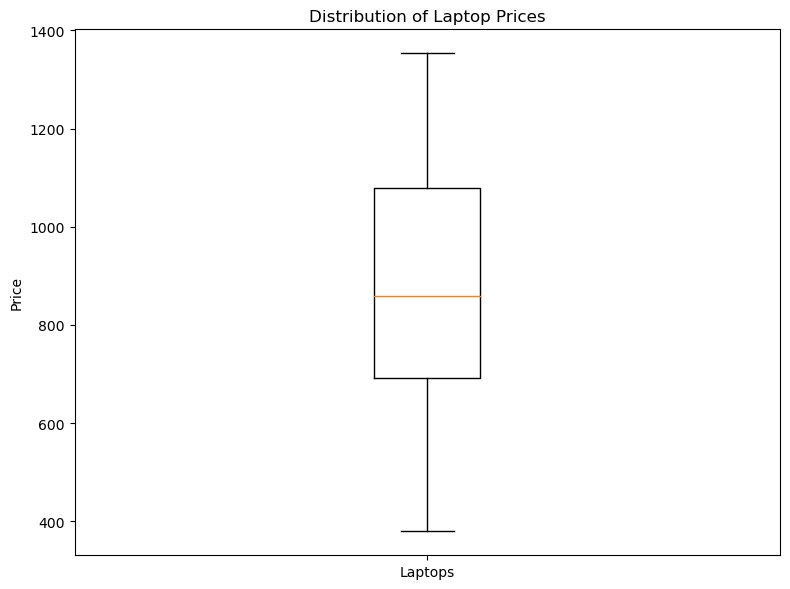

In [87]:
# Scraping Gjirafa50 Website for laptop prices- Using BeautifulSoup
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import os

laptops = []   # List to store names of the laptop models
prices = []     # List to store prices of the laptops

sp = requests.get("https://gjirafa50.com/search?q=laptop")
sp = BeautifulSoup(sp.content, 'html.parser')

# print(sp.prettify())

for each in sp.find_all('a', href=True, attrs={'class':'text-gray-700 text-sm md:text-base product-title-lines hover:underline'}):
    name1 = each['title']
    name = name1[0:80]       # will take only first 80 characetrs of the name
    if name is None:    #if the name does not exist
        laptops.append(None)
    else:
        laptops.append(name) # Get the text part

price_elements = sp.find_all('span', class_='price font-semibold text-gray-700 text-base md:text-xl')
for price_element in price_elements:
    price = price_element.text.strip()               # price is a string exprssion in this case
    size = len(price)
    price1 = price[:size-2]                          # remove a space and Euro symbol
    prices.append(float(price1.replace(',','')))     # remove commas before converting to a float

# Structuring and storing data
df = pd.DataFrame({'Product Name': laptops, 'Price': prices}) 
print(df.to_string())

# Create a box plot of the prices
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.boxplot(df['Price'])
plt.ylabel('Price')
plt.title('Distribution of Laptop Prices')
plt.xticks([1], ['Laptops'])  # Label the x-axis with 'Laptops'
plt.tight_layout()

# Show the plot
plt.show()
